# Contour Plot of ASV
*Akira Di Sandro, 6/25/20*
<br>
In this notebook, I will be making a contour plot of the ASV (along strait velocity) using Marion's file 'SolomonStrait_westernXsection_linear2bot_sat4surf.mat'.

## 1. Load in Data

In [91]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import random

In [92]:
from scipy.io import loadmat
x = loadmat('SolomonStrait_westernXsection_linear2bot_sat4surf.mat')

## 2. Save Data into variables

In [24]:
#along strait velocity saved in 255x99x590 matrix (depth x points along cross section x timestamps)
asv = x['ASV']

#lon: lon points along cross section, lat (same as lon), xdist: distance from start of cross section
lon = x['bathy'][0][0][2][0]
lat = x['bathy'][0][0][3][0]
xdist = x['bathy'][0][0][4][0]
points = np.arange(99)

#raw_time: datenums associated to each day mooring data was taken
raw_time = x['time'][0]

#depth: array of all the depths possible
depth = x['z']

In [78]:
x_dist = x['bathy'][0][0]['dist'][0]
x_dist

array([  0.        ,   2.09695274,   4.19388381,   6.29079314,
         8.38768068,  10.48454638,  12.58139017,  14.67821201,
        16.77501185,  18.87178961,  20.96854526,  23.06527873,
        25.16198996,  27.25867891,  29.35534552,  31.45198973,
        33.54861149,  35.64521074,  37.74178743,  39.8383415 ,
        41.9348729 ,  44.03138157,  46.12786745,  48.2243305 ,
        50.32077065,  52.41718785,  54.51358204,  56.60995318,
        58.7063012 ,  60.80262605,  62.89892767,  62.89892767,
        64.92249673,  66.94606674,  68.96963768,  70.99320957,
        73.01678241,  75.04035618,  77.0639309 ,  79.08750656,
        81.11108317,  83.13466071,  85.1582392 ,  87.18181863,
        89.205399  ,  91.22898032,  93.25256258,  95.27614578,
        97.29972992,  99.323315  , 101.34690103, 103.370488  ,
       105.39407591, 107.41766476, 109.44125455, 111.46484529,
       113.48843696, 115.51202958, 117.53562314, 119.55921764,
       121.58281309, 123.60640947, 125.6300068 , 127.65

Convert datenum to timestamps python can understand.

In [9]:
# this code reads matlab datenums and returns it in a datetime vector. 
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

In [12]:
times = []

for time in raw_time:
    times = np.concatenate([times, [matlab2datetime(int(time))]])

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

## 3. Attempt first plot
I'm taking a snapshot of time to do a contour plot of ASV.

In [106]:
# change nan's to zeros (?) for now
time0 = asv[:,:,0]
time0.shape
#nan_in_time0 = np.isnan(time0)
#time0[nan_in_time0] = 0
#time0.shape

(225, 99)

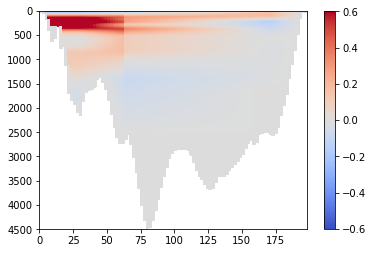

In [107]:
plt.pcolormesh(x_dist, depth, time0, cmap='coolwarm', vmin='-0.6', vmax='0.6')
plt.gca().invert_yaxis()
plt.colorbar()
# start with just time0 and try adding the coordinates
# flip y-axis and change color, add colorbar
# most of the interesting stuff is happening at top 2000m

## 4. Average ASV plot

In [183]:
# use asv = x['ASV'] as ds in this function
def avg_times(ds):
    avg = []
    lengths = ds.shape
    num = lengths[2] # num is 590, number of time steps stored
    for i in range(num):
        if i == 0:
            avg = ds[:,:,0]
        else:
            avg = np.add(avg, ds[:,:,i]) 
    avg = avg/num
    return avg

In [184]:
avg_time = avg_times(asv)
avg_time

array([[ 0.        ,  0.        , -0.28137913, ...,  0.00322807,
         0.        ,  0.        ],
       [        nan,  0.        , -0.21167181, ...,         nan,
                nan,         nan],
       [        nan,         nan,  0.        , ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

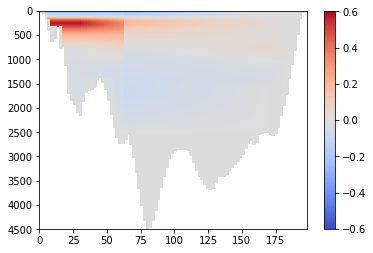

In [185]:
plt.pcolormesh(x_dist, depth, avg_time, cmap='coolwarm', vmin='-0.6', vmax='0.6')
plt.gca().invert_yaxis()
plt.colorbar()

### This is just example code I used to understand how to use pcolor

In [87]:
def test_pcolor_datetime_axis():
    fig = plt.figure()
    fig.subplots_adjust(hspace=0.4, top=0.98, bottom=.15)
    base = dt.datetime(2013, 1, 1)
    x = np.array([base + dt.timedelta(days=d) for d in range(21)])
    y = np.arange(21)
    z1, z2 = np.meshgrid(np.arange(20), np.arange(20))
    z = z1 * z2
    plt.subplot(221)
    plt.pcolor(x[:-1], y[:-1], z)
    plt.subplot(222)
    plt.pcolor(x, y, z)
    x = np.repeat(x[np.newaxis], 21, axis=0)
    y = np.repeat(y[:, np.newaxis], 21, axis=1)
    plt.subplot(223)
    plt.pcolor(x[:-1, :-1], y[:-1, :-1], z)
    plt.subplot(224)
    plt.pcolor(x, y, z)
    #plt.colorbar()
    for ax in fig.get_axes():
        for label in ax.get_xticklabels():
            label.set_ha('right')
            label.set_rotation(30) 

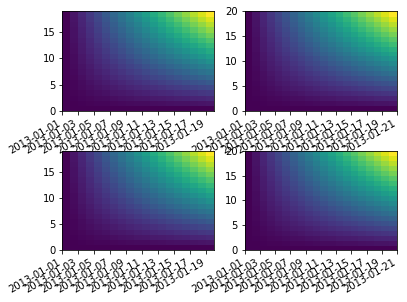

In [88]:
test_pcolor_datetime_axis()